<a href="https://colab.research.google.com/github/guswns3396/PSYC-221-Project/blob/main/Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd "/content/drive/MyDrive/Colab Notebooks/PSYC221"

/content/drive/MyDrive/Colab Notebooks/PSYC221


In [7]:
!ls

brainmetshare-3


# Install & Import Dependencies

In [8]:
import os
from glob import glob

import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset

# Load Data

In [9]:
path_data = 'brainmetshare-3'

In [10]:
# custom dataset class
class CustomDataset(Dataset):
  # class attribute for mapping img types to idx of np array
  IMG_TYPES = {
    'bravo': 0,
    'flair': 1,
    't1_gd': 2,
    't1_pre': 3,
    'seg': 4
  }

  def __init__(self, img_dir, transform=None):
    """
    initializes dataset instance
    args:
      img_dir: path to directory containing subjects & their images
    """
    # get subject directory paths
    self.subjs = glob(os.path.join(img_dir, 'Mets_*'))
    # transform
    self.transform = transform
    # get image paths for each subject
    self.imgs = [
      {
        img_type: os.path.join(subj, img_type + '.nii.gz')
        for img_type in CustomDataset.IMG_TYPES
        if os.path.isfile(os.path.join(subj, img_type + '.nii.gz'))
      }
      for subj in self.subjs
    ]


  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, idx):
    """
    returns multi modal images of given subject
    args:
      idx: int of subject index
    returns:
      torch array of shape (5, 256, 256, 150) -> image type x length x height x width
    """
    # load images as np arrays in a list
    imgs = [nib.load(self.imgs[idx][img_type]).get_fdata() for img_type in sorted(CustomDataset.IMG_TYPES, key=lambda k: CustomDataset.IMG_TYPES[k])]

    # transform images
    if self.transform:
      for i, img in enumerate(imgs):
        imgs[i] = self.transform(imgs[i])

    # turn into tensors
    imgs = torch.from_numpy(np.array(imgs))

    return imgs


In [11]:
train_ds = CustomDataset(os.path.join(path_data, 'train'))

image shape: torch.Size([5, 256, 256, 150])


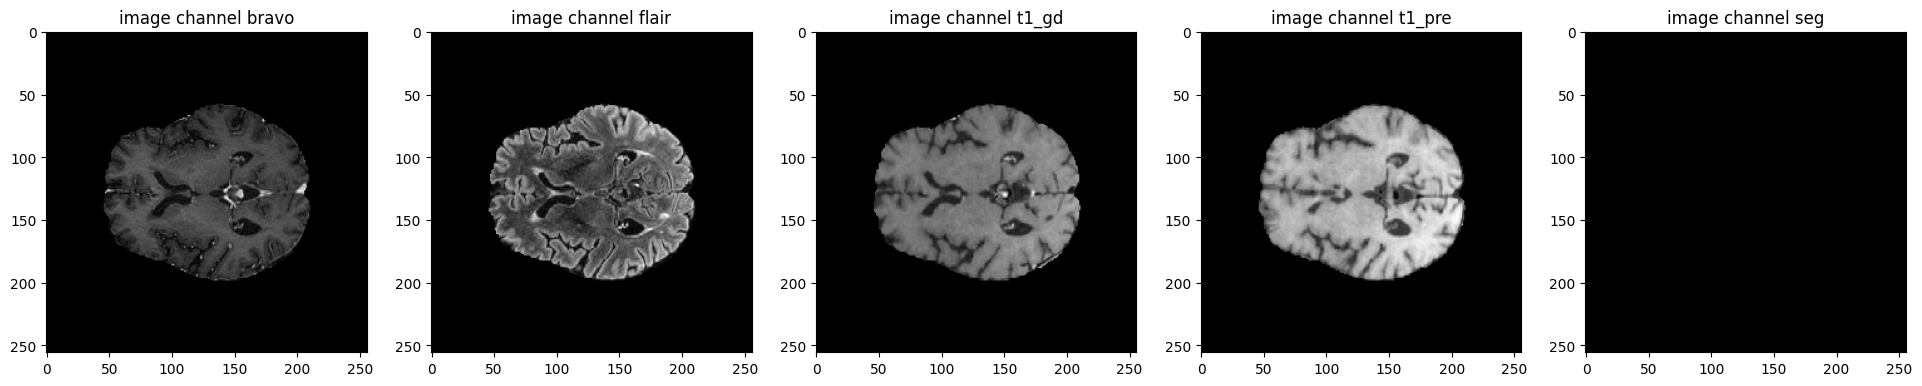

In [21]:
subj_idx = 0
slice_id = 76

# visualize a slice from each image modality
print(f"image shape: {train_ds[subj_idx].shape}")
plt.figure("image", (24, 6))
for i, img_type in enumerate(CustomDataset.IMG_TYPES):
    plt.subplot(1, len(CustomDataset.IMG_TYPES), i + 1)
    plt.title(f"image channel {img_type}")
    plt.imshow(train_ds[subj_idx][CustomDataset.IMG_TYPES[img_type], :, :, slice_id].detach().cpu(),  cmap="gray")
plt.show()